In [4673]:
import numpy as np
import matplotlib.pyplot as plt

In [4674]:
amount = 24
x = np.random.randint(0, 100, amount)
r = np.random.randint(-5, 5, amount)

# x = np.random.uniform(0, 100, amount)
# r = np.random.uniform(-5, 5, amount)

# y = x * 0.01 + r
# y = x * 0.3 + 100 + r
# y = x * (-0.3) - 200 + r
# y = x * 0.3 - 10 + r
# y = x * (-0.3) + r
# y = x * (-0.3) + 30 + r
y = x * (-0.3) + 8000 + r
# y = x * (-0.3) + 10 + r
# y = x * 0.3 - 10 + r
# y = x * 0.3 + r
x

array([92, 93, 42, 35, 37, 56, 56, 74, 86, 33, 42,  1, 15,  4, 59, 25, 18,
       79, 10, 11, 14, 56, 67, 74])

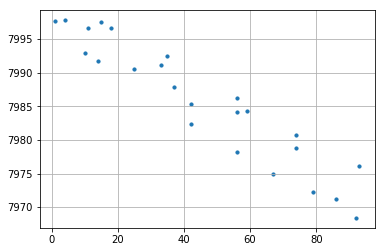

In [4675]:
plt.scatter(x, y, s=10)
plt.grid()
plt.show()

In [4676]:
x_origin = x.copy()
x_min = np.min(x_origin)
x_max = np.max(x_origin)
x = (x - x_min) / (x_max - x_min)
x

array([0.98913043, 1.        , 0.44565217, 0.36956522, 0.39130435,
       0.59782609, 0.59782609, 0.79347826, 0.92391304, 0.34782609,
       0.44565217, 0.        , 0.15217391, 0.0326087 , 0.63043478,
       0.26086957, 0.18478261, 0.84782609, 0.09782609, 0.10869565,
       0.14130435, 0.59782609, 0.7173913 , 0.79347826])

In [4677]:
# weight = np.array([1, 1], np.float32)
# weight = np.random.rand(2)

In [4678]:
# y_mean = y.mean()

In [4679]:
# for _ in range(10000):
#     predict_mean = np.mean(x) * weight[0] + weight[1]
#     weight[0] -= (predict_mean - y_mean) * np.mean(x) * alpha
#     weight[1] -= (predict_mean - y_mean) * 1 * alpha

In [4680]:
# alpha = 0.0001
# weight[1] = 10
# for _ in range(1000):
#     predict_mean = np.mean(x) * weight[0] + weight[1]
#     weight[0] -= (predict_mean - y_mean) * np.mean(x) * alpha

In [4681]:
# alpha = 0.01
# weight[0] = 0.3
# for _ in range(1000):
#     predict_mean = np.mean(x) * weight[0] + weight[1]
#     weight[1] -= (predict_mean - y_mean) * 1 * alpha

In [4682]:
# ## not work !!!
# alpha = np.array([0.0001, 0.1])
# for _ in range(1000):
#     predict_mean = np.array([np.mean(x) * weight[0], weight[1]])
#     weight[0] -= (predict_mean[0] - y_mean) * alpha[0]
#     weight[1] -= (predict_mean[1] - y_mean) * alpha[1]
# weight

In [4683]:
# # alpha = np.array([0.0001, 0.01])
# alpha = np.array([0.0001, 0.0001])
# for _ in range(1000):
#     predict_mean = np.mean(x) * weight[0] + weight[1]
#     weight[0] -= (predict_mean - y_mean) * np.mean(x) * alpha[0]
#     weight[1] -= (predict_mean - y_mean) * 1 * alpha[1]
# # weight

In [4684]:
weight = np.zeros(2, np.float32)
weight[0] = np.random.rand()
weight[1] = np.max(y)
epochs = 100
# error = [[], []]
# error = [0] * epochs
error = np.zeros(epochs, np.float32)
selection = np.array([0, 1], np.float32)
# alpha = np.array([0.00001, 0.01])
alpha = np.array([0.1, 0.01])
# delta = np.array([0, 0], np.float32)
delta = np.zeros(2, np.float32)
for epoch in range(epochs):
    # error[0].append(epoch) 
    # error[1].append((np.mean(x * weight[0] + weight[1]) - np.mean(y)) ** 2)
    # error.append((np.mean(x * weight[0] + weight[1]) - np.mean(y)) ** 2)
    # error[epoch] = (np.mean(x * weight[0] + weight[1]) - np.mean(y)) ** 2
    error[epoch] = np.power(np.mean(x * weight[0] + weight[1]) - np.mean(y), 2)


    # error[0, epoch] = epoch 
    # error[1, epoch] = (np.mean(x * weight[0] + weight[1]) - np.mean(y)) ** 2
    delta[:] = 0
    for i in range(len(x)):
        selection[0] = x[i]
        # print(selection[0], x[i])
        # predict = x[i] * weight[0] + weight[1]
        # predict = selection[0] * weight[0] + weight[1]
        predict = selection @ weight
        # predict = np.dot(selection, weight)



        # delta[0] += (predict - y[i]) * x[i]
        # delta[1] += (predict - y[i]) * 1
        # delta = delta + (predict - y[i]) * selection
        delta += (predict - y[i]) * selection
    # weight[0] -= delta[0] * alpha[0]
    # weight[1] -= delta[1] * alpha[1]
    weight -= delta * alpha
weight


array([ -27.233736, 7998.689   ], dtype=float32)

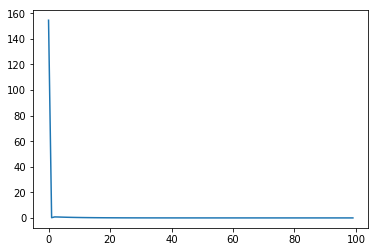

In [4685]:
# x_axis = list(range(epochs))
plt.plot(range(epochs), error)
plt.show()
# error

In [4686]:
# x_pred = np.array([x_min, x_max])
x_pred = np.array([x_min, x_max])
x_calc = (x_pred - x_min) / (x_max - x_min)
# y_pred = x_pred * weight[0] + weight[1]
y_pred = x_calc * weight[0] + weight[1]

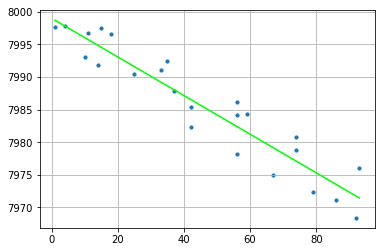

In [4687]:
# plt.scatter(x, y, s=10)
plt.scatter(x_origin, y, s=10)
plt.plot(x_pred, y_pred, color="#00FF00")
plt.grid()
plt.show()